Добавить коменты, подписать и перевести все выводы, разобраться с последний заданием(оч. большой loss) - сравнить его с dataset diabetes ( какой будет loss) , скопировав полностью код из тетрадки.

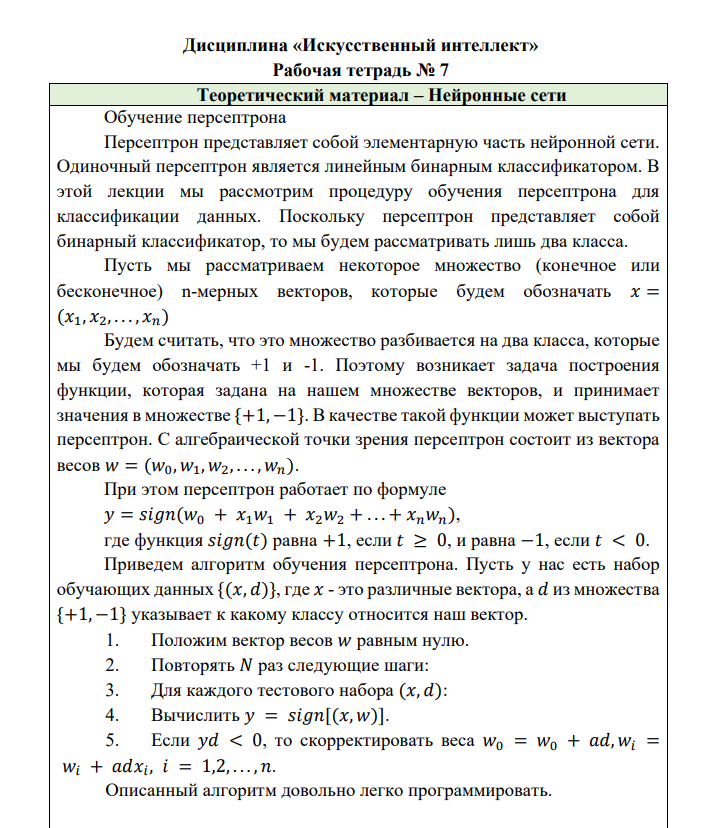
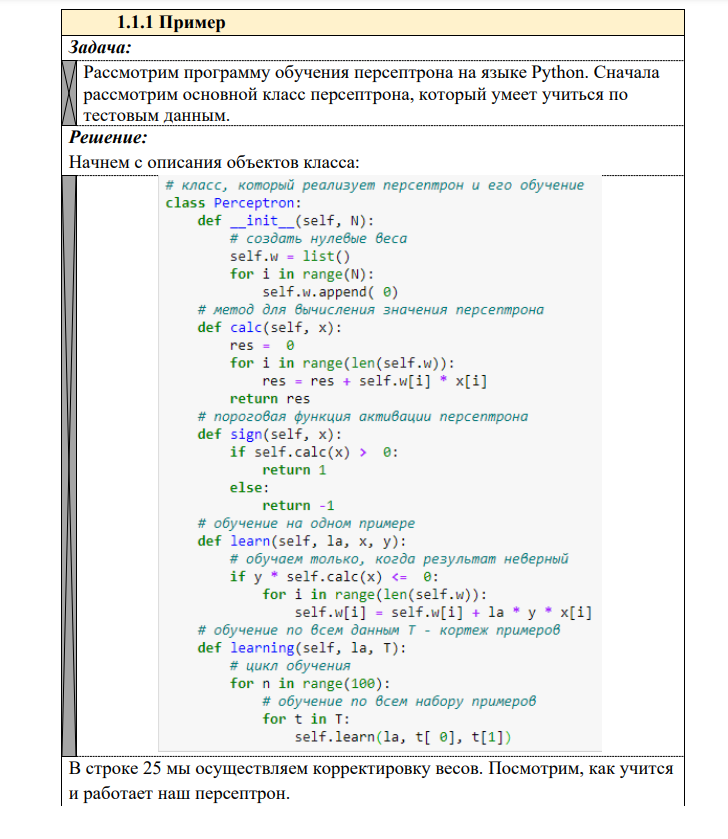
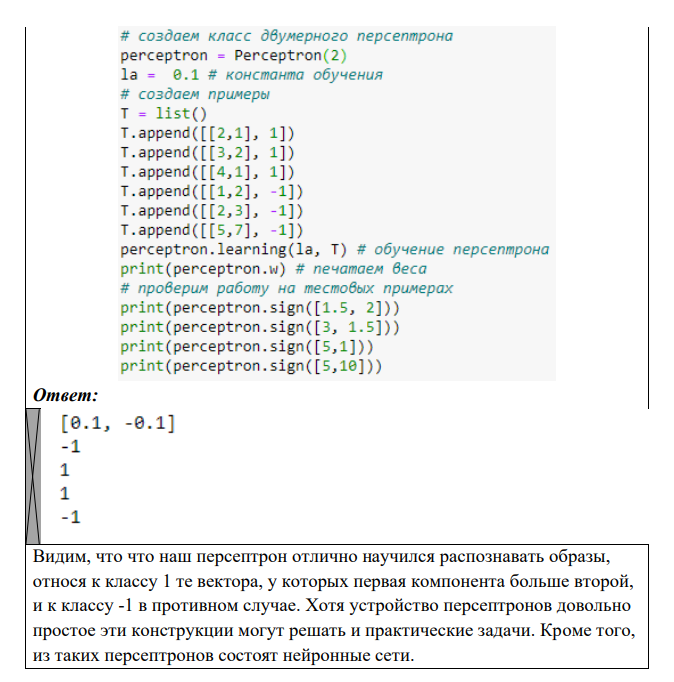
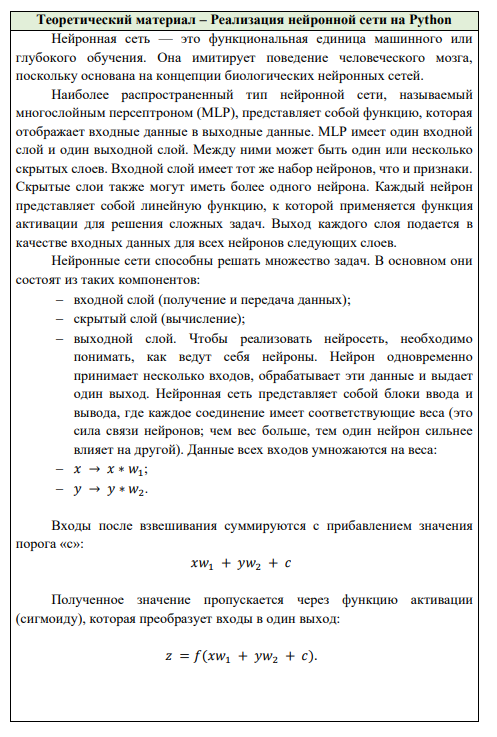
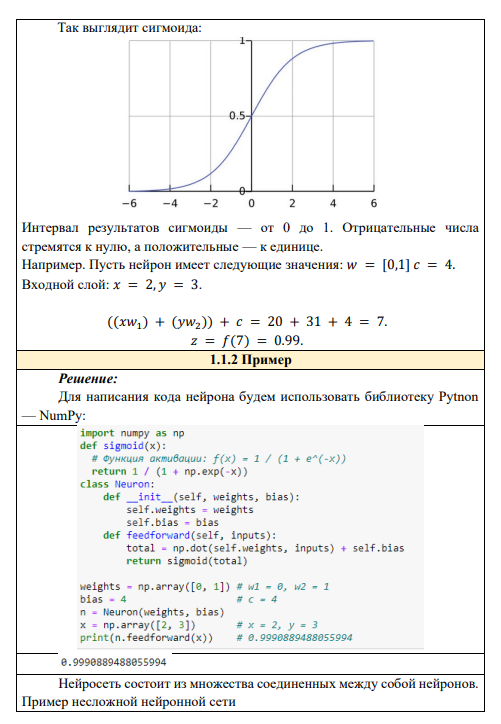
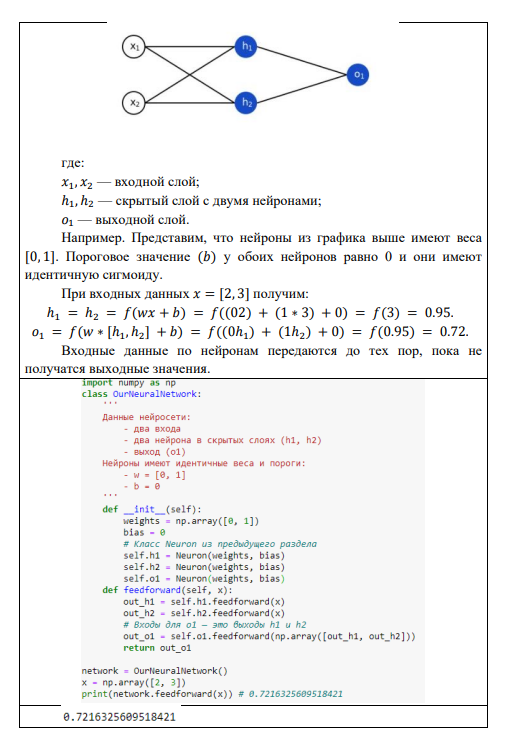
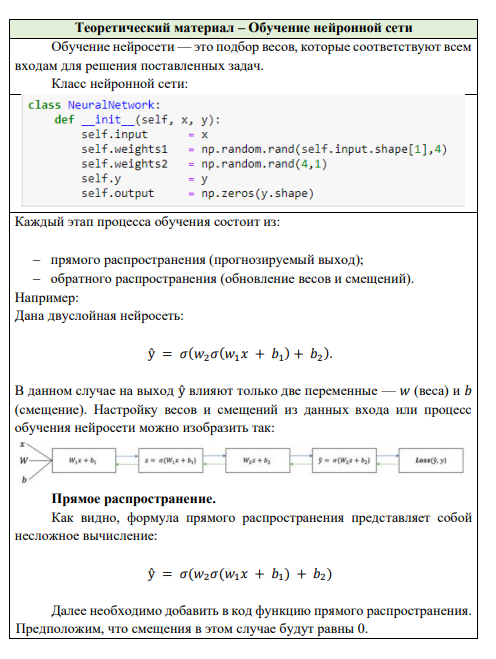
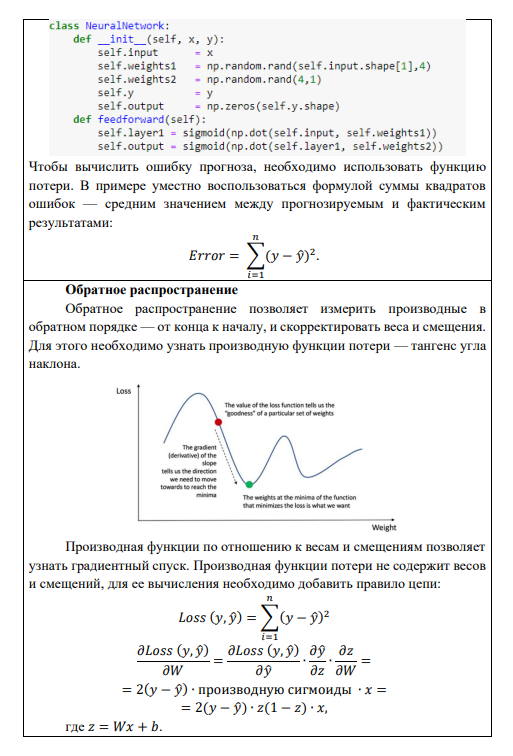
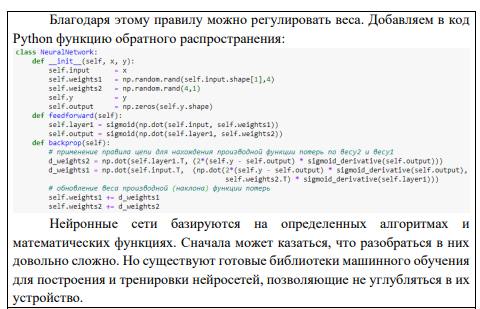

# --------________--------________--------________--------________--------________

# Скриншот задания №1
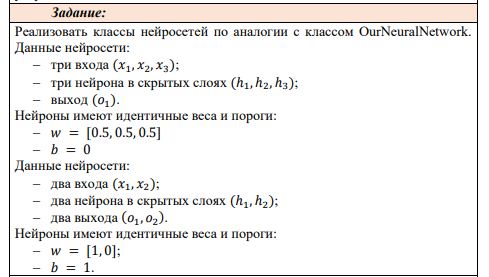

# Текстовое условие:
Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork.

Данные нейросети:

- три входа (𝑥1, 𝑥2, 𝑥3);
- три нейрона в скрытых слоях (ℎ1, ℎ2, ℎ3);
- выход (𝑜1).

Нейроны имеют идентичные веса и пороги:
- 𝑤 = [0.5, 0.5, 0.5]
- 𝑏 = 0


Данные нейросети:
- два входа (𝑥1, 𝑥2);
- два нейрона в скрытых слоях (ℎ1, ℎ2);
- два выхода (𝑜1, 𝑜2).

Нейроны имеют идентичные веса и пороги:
- 𝑤 = [1, 0];
- 𝑏 = 1.



# ПЕРВАЯ НЕЙРОСЕТЬ 

In [24]:
import numpy as np
## функция активации - сигмоида
def sigmoid(x):
    # Функция активации: f(x) = 1/(1+e^(-x))
    return 1 / (1+np.exp(-x))
## код нейрона
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

class NeuralNetwork:

    def __init__(self, x, y):
        self.input    = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y        = y
        self.output   = np.zeros(y.shape)
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        
class OurNeuralNetwork:
    """
    данные нейросети:
        − три входа (𝑥1,𝑥2,𝑥3);
        − три нейрона в скрытых слоях (ℎ1,ℎ2,ℎ3);
        − выход (𝑜1).
    нейроны имеют идентичные веса и пороги:
        − 𝑤 = [0.5,0.5,0.5]
        − 𝑏 = 0
    """
    def __init__(self):
        weights = np.array([0.5,0.5,0.5])
        bias = 0
        # класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        # входы для о1 - это выходы h1 и h2 и h3
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

network = OurNeuralNetwork()
x = np.array([2,3,4])             # входные данные x

print("Выходное значение - ", network.feedforward(x))     # выходное значение 

Выходное значение -  0.8151036049051821


# ВТОРАЯ НЕЙРОСЕТЬ

In [9]:
import numpy as np
## функция активации - сигмоида
def sigmoid(x):
    # Функция активации: f(x) = 1/(1+e^(-x))
    return 1 / (1+np.exp(-x))
## код нейрона
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

class NeuralNetwork:

    def __init__(self, x, y):
        self.input    = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y        = y
        self.output   = np.zeros(y.shape)
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        
class OurNeuralNetwork:
    """
    данные нейросети:
        - два входа (x1,x2)
        - два нейрона в скрытых слоях (h1, h2)
        - выход (о1, o2)
    нейроны имеют идентичные веса и пороги:
        - w = [1,0]
        - b = 1
    """
    def __init__(self):
        weights = np.array([1,0])
        bias = 1
        # класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)
        self.o = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # входы для о1 - это выходы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h2, out_h1]))
        out_o = self.o.feedforward(np.array([out_o2, out_o1]))
        return out_o

network = OurNeuralNetwork()
x = np.array([2,3])                                         # входные данные x (2 шутки: x1,x2)
print("Выходное значение  - ", network.feedforward(x))      # выходные значения (выход o1)

Выходные значения  -  0.8671195555587996


# ____-------------______-----------_______----------------_____________-----------______--------

# ЗАДАНИЕ №2

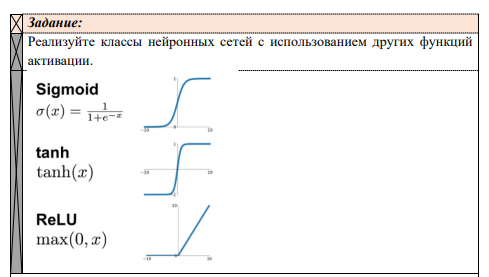

# ФУНКЦИЯ АКТИВАЦИИ tanh(x) - гиперболическая функция; возвращает гиперболический тангенс числа

In [25]:
import numpy as np
def tanh(x):
    # Функция активации: f(x) = tanh(x)
    return np.tanh(x)

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)

class NeuralNetwork:

    def __init__(self, x, y):
        self.input    = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y        = y
        self.output   = np.zeros(y.shape)
        
    def feedforward(self):
        self.layer1 = tanh(np.dot(self.input, self.weights1))
        self.output = tanh(np.dot(self.layer1, self.weights2))
        
class OurNeuralNetwork:
    """
    данные нейросети:
        − три входа (𝑥1,𝑥2,𝑥3);
        − три нейрона в скрытых слоях (ℎ1,ℎ2,ℎ3);
        − выход (𝑜1).
    нейроны имеют идентичные веса и пороги:
        − 𝑤 = [0.5,0.5,0.5]
        − 𝑏 = 0
    """
    def __init__(self):
        weights = np.array([0.5,0.5,0.5])
        bias = 0
        # класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        # входы для о1 - это выходы h1 и h2 и h3
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

network = OurNeuralNetwork()
x = np.array([2,3,4])                             # входные данные x (2 шутки: x1,x2)
print("Выходное значение  - ",network.feedforward(x))

Выходное значение  -  0.9050813365686774


In [11]:
import numpy as np
def tanh(x):
    # Функция активации: f(x) = tanh(x)
    return np.tanh(x)

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)

class NeuralNetwork:

    def __init__(self, x, y):
        self.input    = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y        = y
        self.output   = np.zeros(y.shape)
        
    def feedforward(self):
        self.layer1 = tanh(np.dot(self.input, self.weights1))
        self.output = tanh(np.dot(self.layer1, self.weights2))
        
class OurNeuralNetwork:
    """
    данные нейросети:
        - два входа (x1,x2)
        - два нейрона в скрытых слоях (h1, h2)
        - выход (о1, o2)
    нейроны имеют идентичные веса и пороги:
        - w = [1,0]
        - b = 1
    """
    def __init__(self):
        weights = np.array([1,0])
        bias = 1
        # класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)
        self.o = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # входы для о1 - это выходы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h2, out_h1]))
        out_o = self.o.feedforward(np.array([out_o2, out_o1]))
        return out_o

network = OurNeuralNetwork()
x = np.array([2,3])                                         # входные данные x (2 шутки: x1,x2)
print("Выходное значение  - ", network.feedforward(x))      # выходные значения (выход o1)

Выходные значения  -  0.961369383860628


# ФУНКЦИЯ АКТИВАЦИИ ReLU(x);  ReLU — это функция активации, определяемая как положительная часть ее аргумента: где x — вход нейрона.

In [26]:
import numpy as np


def relu(x):
    return np.maximum(0, x)


class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return relu(total)

class OurNeuralNetwork:
    """
    данные нейросети:
        - два входа (x1,x2)
        - два нейрона в скрытых слоях (h1, h2)
        - выход (о1, o2)
    нейроны имеют идентичные веса и пороги:
        - w = [1,0]
        - b = 1
    """

    def __init__(self):
        weights = np.array([1, 0])
        bias = 1
        # класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)
        self.o = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # входы для о1 - это выходы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h2, out_h1]))
        out_o = self.o.feedforward(np.array([out_o2, out_o1]))
        return out_o


network = OurNeuralNetwork()
x = np.array([2, 3])  # входные данные x (2 шутки: x1,x2)
print("Выходное значение  - ", network.feedforward(x))  # выходные значения (выход o1)

Выходное значение  -  5


In [27]:
import numpy as np
def relu(x):
    if x <0:
        return 0
    elif x >= 0:
        return x

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return relu(total)

class OurNeuralNetwork:
    """
    данные нейросети:
        − три входа (𝑥1,𝑥2,𝑥3);
        − три нейрона в скрытых слоях (ℎ1,ℎ2,ℎ3);
        − выход (𝑜1).
    нейроны имеют идентичные веса и пороги:
        − 𝑤 = [0.5,0.5,0.5]
        − 𝑏 = 0
    """

    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        # класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        # входы для о1 - это выходы h1 и h2 и h3
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1


network = OurNeuralNetwork()
x = np.array([2, 3, 4])
print("Выходное значение  - ",network.feedforward(x))

Выходное значение  -  6.75


# ------------___________ ------------___________ ------------___________ ------------___________ ------------___________ ------------___________ ------------___________

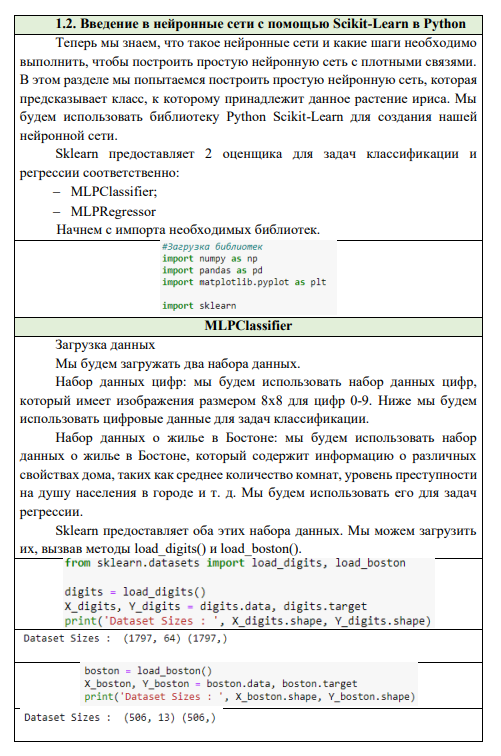
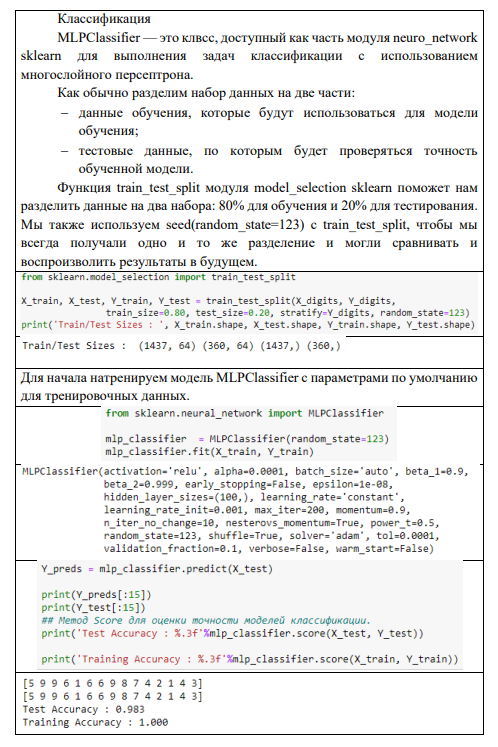
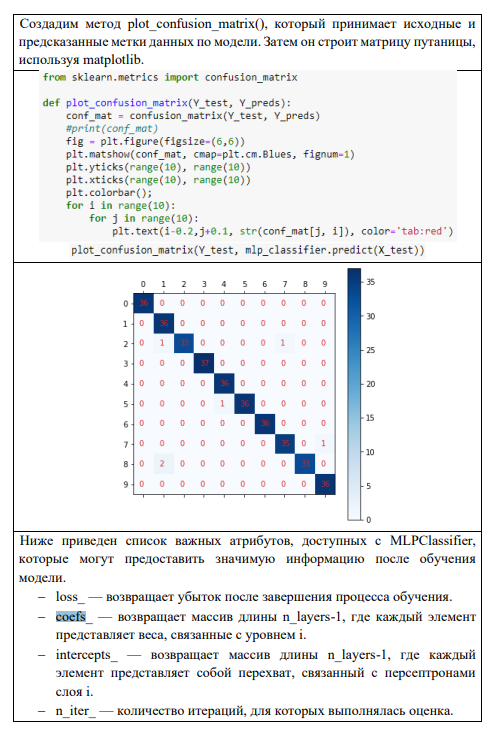
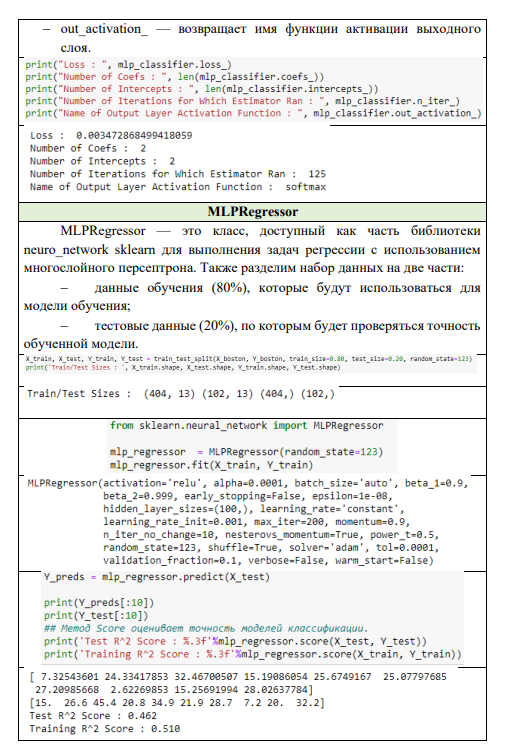
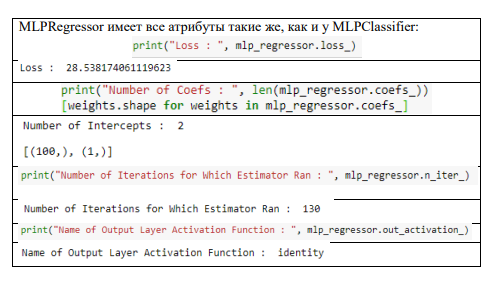

# --------------------____________________--------------------____________________--------------------____________________--------------------____________________

#  Последнее задание

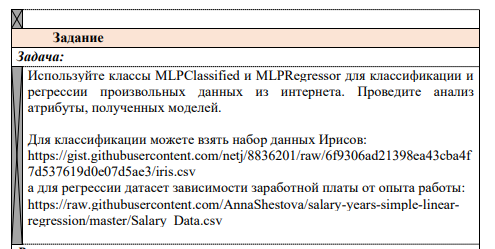

## Классификация на наборе данных Ирисов

Размер датасета :  (150, 4) (150,)
Размеры обучения/испытаний :  (120, 4) (30, 4) (120,) (30,)
[1 0 2 2 0 0 2 2 2 0 0 1 2 1 2]
[1 0 2 2 0 0 2 1 2 0 0 1 2 1 2]
Точность испытаний :   1
Точность обучения : 0.992
Убыток после завершения процесса обучения(Loss):  0.06237838693566961
Массив длины n_layers-1, где каждый элемент представляет веса, связанные с уровнем i:(coefs) 2
Массив длины n_layers-1, где каждый элемент представляет собой перехват, связанный с персептронами слоя i(intercepts):  2
Количество итераций, для которых выполнялась оценка(iter):  641
Имя функции активации выходного слоя:  softmax


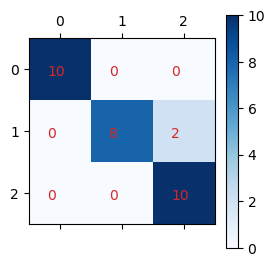

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix


iris = load_iris()
X_iris, Y_iris, = iris.data, iris.target
print("Размер датасета : ", X_iris.shape, Y_iris.shape)


X_train, X_test, Y_train, Y_test = train_test_split(X_iris, Y_iris, train_size=0.80, test_size=0.20,stratify=Y_iris,random_state=123)
print('Размеры обучения/испытаний : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape,)

mlp_classifier = MLPClassifier(random_state=123,max_iter=5000)
mlp_classifier.fit(X_train, Y_train)




Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15])

print('Точность испытаний : %3.f'%mlp_classifier.score(X_test, Y_test))
print('Точность обучения : %.3f'%mlp_classifier.score(X_train, Y_train))


def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    fig = plt.figure(figsize=(3,3))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(3), range(3))
    plt.xticks(range(3), range(3))
    plt.colorbar();
    for i in range(3):
        for j in range(3):
            plt.text(i-0.2, j+0.1, str(conf_mat[j,i]), color='tab:red')

plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))

print("Убыток после завершения процесса обучения(Loss): ", mlp_classifier.loss_)

print("Массив длины n_layers-1, где каждый элемент представляет веса, связанные с уровнем i:(coefs)"  , len(mlp_classifier.coefs_))

print("Массив длины n_layers-1, где каждый элемент представляет собой перехват, связанный с персептронами слоя i(intercepts): ", len(mlp_classifier.intercepts_))

print("Количество итераций, для которых выполнялась оценка(iter): ", mlp_classifier.n_iter_)

print("Имя функции активации выходного слоя: " ,mlp_classifier.out_activation_)

## Регрессия на наборе зарплат

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix


url = r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'

data = pd.read_csv(url)

X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:,:-1].values,    # все колонки кроме последней - в признаки
    data.iloc[:,-1].values, # последнюю в целевую переменную (класс)
    train_size=0.80,
    test_size = 0.20, # размер тестовой выборки 20%
    random_state=123
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

mlp_regressor = MLPRegressor(random_state=123,max_iter=50000)
mlp_regressor.fit(X_train, y_train)
Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:5])
print(y_test[:5])
print(' ')

## метод Score для оценки точности моделей классификации
#Коэффициент детерминации, обозначаемый как R^2, измеряет, насколько хорошо уравнение регрессии моделирует фактические...
                                                                                                                #точки данных.
print("(Test R^2 Score) - ",'Коэффициент детерминации испытания: %.3f'%mlp_regressor.score(X_test, y_test))

print("(Training R^2) - ", 'Коэффициент детерминации обучения: %.3f'%mlp_regressor.score(X_train, y_train))

print("Убыток после завершения процесса обучения(Loss): ", mlp_regressor.loss_)
print("Массив длины n_layers-1, где каждый элемент представляет веса, связанные с уровнем i:(coefs)"  , len(mlp_regressor.coefs_))
print("Массив длины n_layers-1, где каждый элемент представляет собой перехват, связанный с персептронами слоя i(intercepts): ", len(mlp_regressor.intercepts_))
print("Количество итераций, для которых выполнялась оценка:(iter) ", mlp_regressor.n_iter_)
print("Имя функции активации выходного слоя: " , mlp_regressor.out_activation_)






(24, 1) (6, 1) (24,) (6,)
[ 55265.2045971  126554.5591937   52335.80522199 116782.59147446
  55265.2045971 ]
[ 54445. 121872.  56642. 116969.  64445.]
 
(Test R^2 Score) -  Коэффициент детерминации испытания: 0.971
(Training R^2) -  Коэффициент детерминации обучения: 0.948
Убыток после завершения процесса обучения(Loss):  16873681.689960096
Массив длины n_layers-1, где каждый элемент представляет веса, связанные с уровнем i:(coefs) 2
Массив длины n_layers-1, где каждый элемент представляет собой перехват, связанный с персептронами слоя i(intercepts):  2
Количество итераций, для которых выполнялась оценка:(iter)  30344
Имя функции активации выходного слоя:  identity
